In [1]:
import numpy as np     #Import numpy library, for numerical computations, array manipulation and mathematical functions
import pandas as pd    #Import pandas, for data analysis and manipulation especially for working with tabular data in DataFrames
import matplotlib.pyplot as plt     #Import matplotlib, for creating various plots and visualizations
import seaborn as sns     #Import seaborn, built on top of Matplotlib, for creating more advanced and aesthetically pleasing statistical visualizations
import os, sys
%matplotlib inline
from pylab import rcParams     #Imports configuration parameters for Matplotlib plots
rcParams['figure.figsize']=(12,6)
sns.set      #Applies Seaborn's default styling to plots, giving them a visually appealing and consistent look
#Silencing warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
#Specifically ignores warnings related to deprecated features preventing them from cluttering the output
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
#Load the dataset
parkinsons_data=pd.read_csv('parkinsons.csv')
parkinsons_data.head(n=10)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [3]:
#Observe the dimensions of the data
parkinsons_data.shape

(195, 24)

In [4]:
print(parkinsons_data.isnull().sum())

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64


In [5]:
parkinsons_data.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [6]:
#Check Duplicate Values
duplicate_Values=parkinsons_data.duplicated()
print(duplicate_Values.sum())
parkinsons_data[duplicate_Values]

0


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE


In [7]:
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [8]:
#Statistical Insights
parkinsons_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [9]:
#Unique values in the columns
for i in parkinsons_data.columns:
    print("**********",i,"**********")
    print()
    print(set(parkinsons_data[i].tolist()))
    print()

********** name **********

{'phon_R01_S42_2', 'phon_R01_S39_3', 'phon_R01_S02_3', 'phon_R01_S19_3', 'phon_R01_S24_3', 'phon_R01_S39_1', 'phon_R01_S06_3', 'phon_R01_S05_4', 'phon_R01_S06_5', 'phon_R01_S16_3', 'phon_R01_S37_2', 'phon_R01_S49_3', 'phon_R01_S26_3', 'phon_R01_S07_1', 'phon_R01_S33_4', 'phon_R01_S04_3', 'phon_R01_S24_2', 'phon_R01_S32_2', 'phon_R01_S18_1', 'phon_R01_S02_4', 'phon_R01_S16_5', 'phon_R01_S19_2', 'phon_R01_S13_3', 'phon_R01_S16_4', 'phon_R01_S27_1', 'phon_R01_S13_5', 'phon_R01_S06_4', 'phon_R01_S18_6', 'phon_R01_S24_1', 'phon_R01_S10_2', 'phon_R01_S08_4', 'phon_R01_S27_2', 'phon_R01_S18_2', 'phon_R01_S35_6', 'phon_R01_S17_5', 'phon_R01_S07_4', 'phon_R01_S31_6', 'phon_R01_S20_1', 'phon_R01_S16_2', 'phon_R01_S01_6', 'phon_R01_S20_3', 'phon_R01_S43_4', 'phon_R01_S10_6', 'phon_R01_S17_1', 'phon_R01_S16_1', 'phon_R01_S08_2', 'phon_R01_S50_5', 'phon_R01_S33_2', 'phon_R01_S13_1', 'phon_R01_S32_3', 'phon_R01_S21_1', 'phon_R01_S50_4', 'phon_R01_S20_4', 'phon_R01_S32_6',

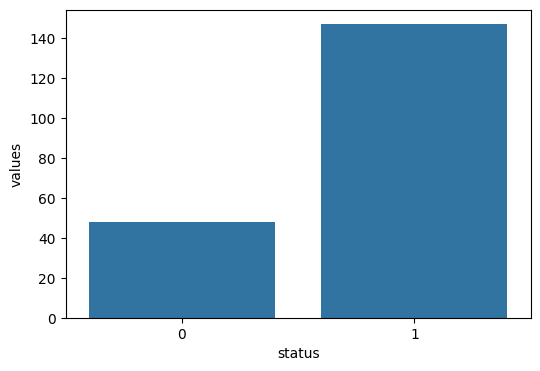

In [10]:
#Check Label Imbalance
plt.figure(figsize=(6, 4))
temp = parkinsons_data["status"].value_counts()
temp_df = pd.DataFrame({'status': temp.index, 'values': temp.values})
sns.barplot(x='status', y='values', data=temp_df)
plt.show()

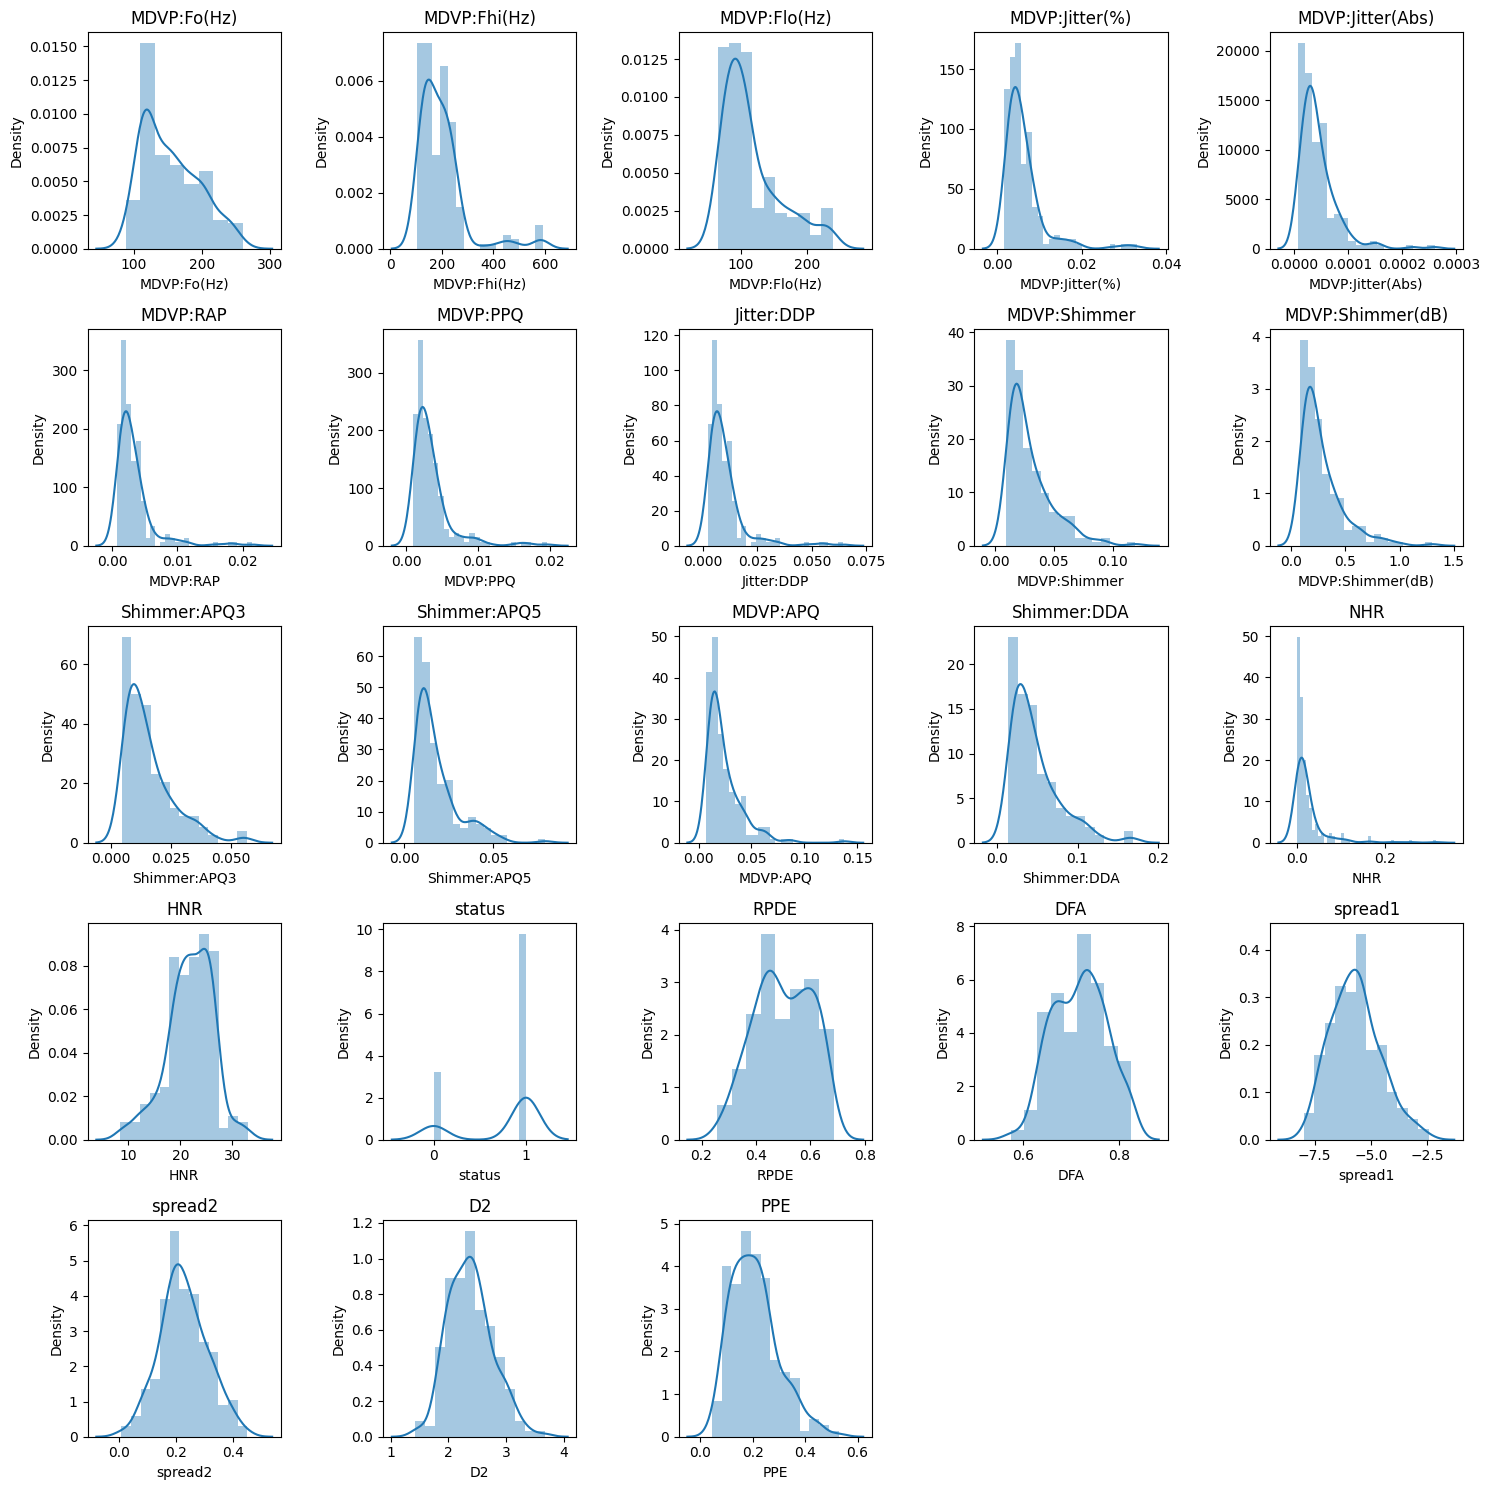

In [11]:
#Find the distribution of data
fig, axes = plt.subplots(5, 5, figsize=(15, 15))
axes = axes.flatten()

def distplots(col, ax):
    sns.distplot(parkinsons_data[col], ax=ax)
    ax.set_title(col)

for i, column_name in enumerate(list(parkinsons_data.columns)[1:], 1):
    distplots(column_name, axes[i-1])
    
# Hide empty subplots
for ax in axes[len(parkinsons_data.columns)-1:]:
    ax.remove()

plt.tight_layout()
plt.show()

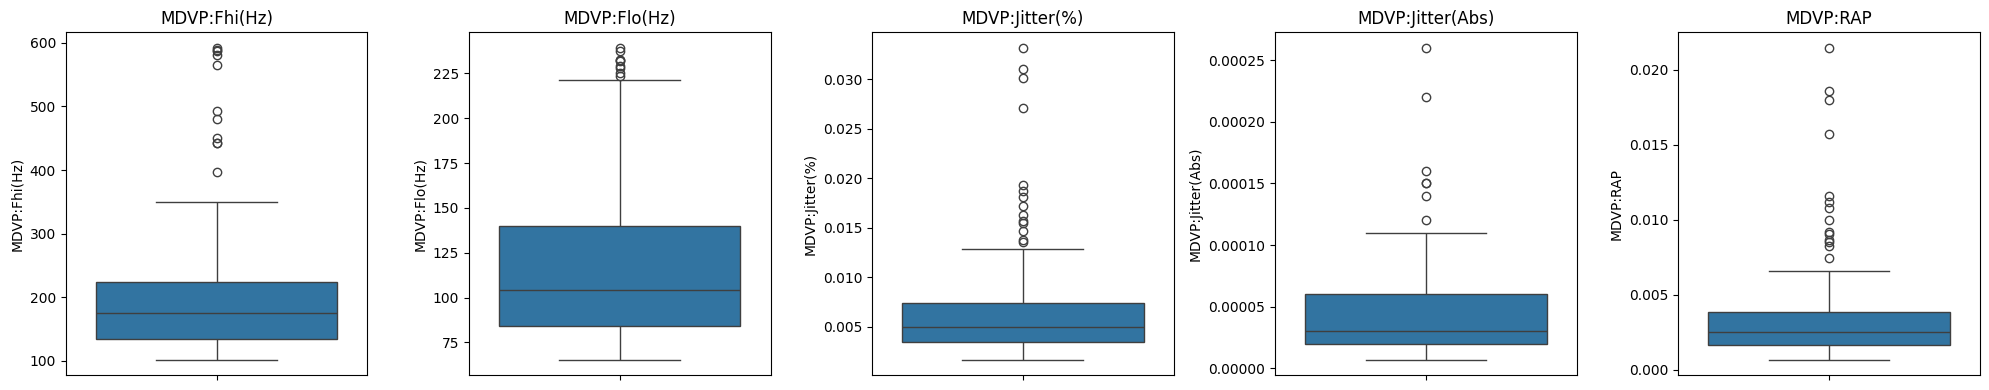

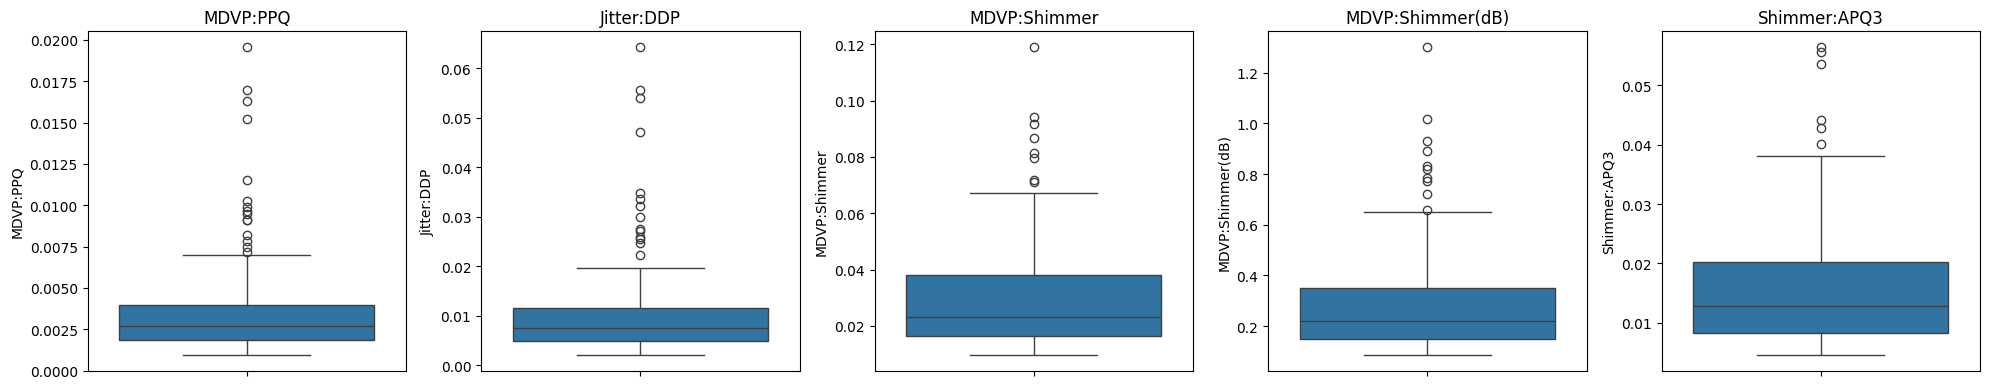

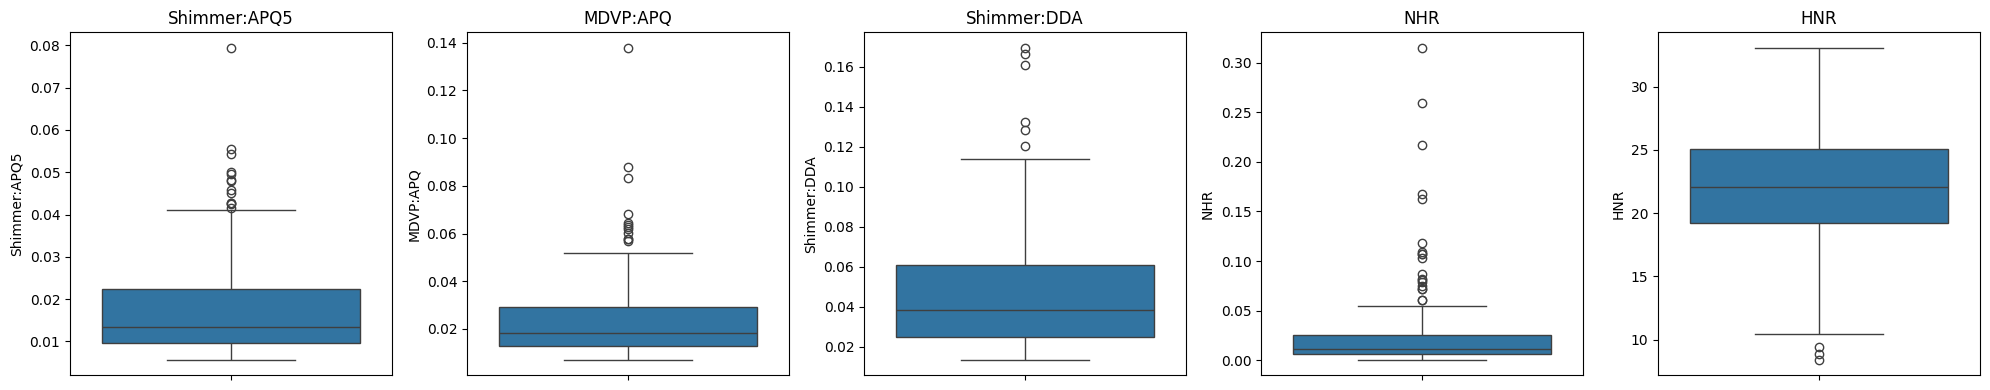

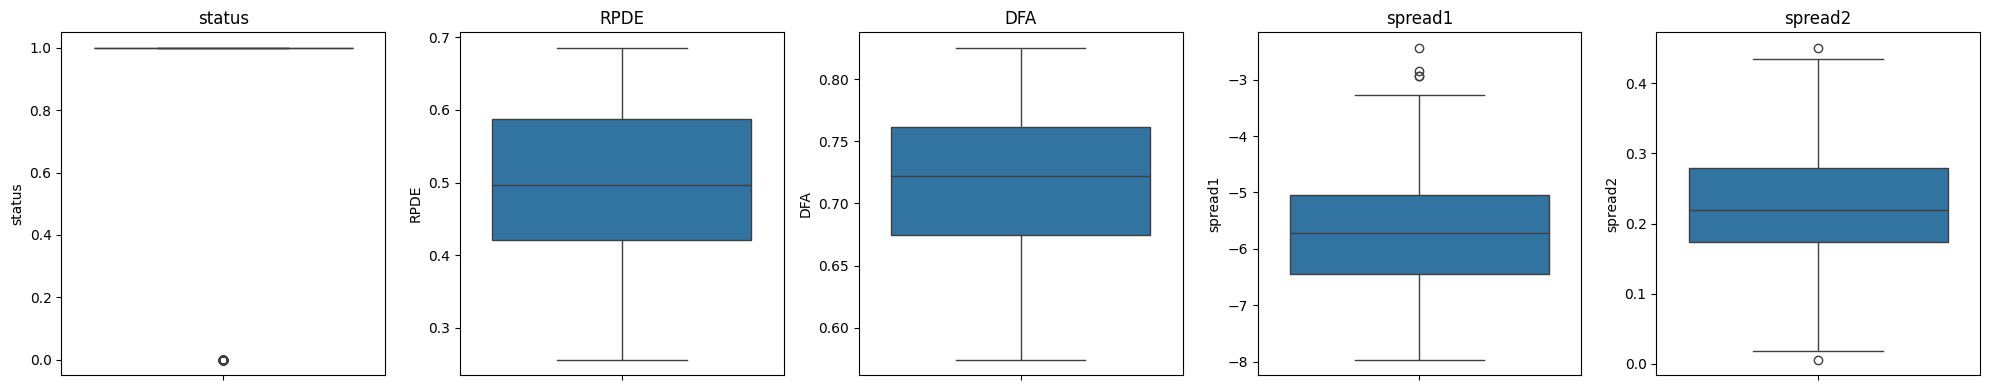

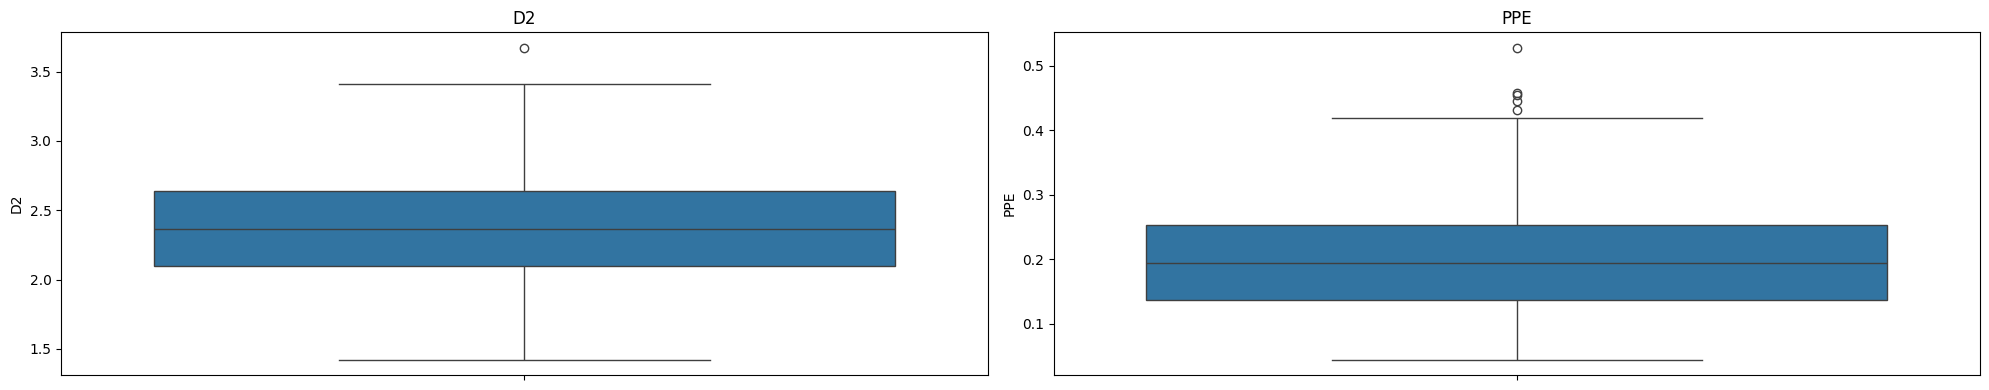

In [12]:
def boxplots(cols):
    fig, axes = plt.subplots(1, len(cols), figsize=(20, 4))
    for i, col in enumerate(cols):
        sns.boxplot(parkinsons_data[col], ax=axes[i])
        axes[i].set_title(col)
    
    #Hide empty subplots
    for ax in axes[len(cols):]:
        ax.remove()
    
    plt.tight_layout()
    plt.show()

numerical_columns = parkinsons_data.select_dtypes(exclude=["object"]).columns[1:]

for i in range(0, len(numerical_columns), 5):
    boxplots(numerical_columns[i:i+5])

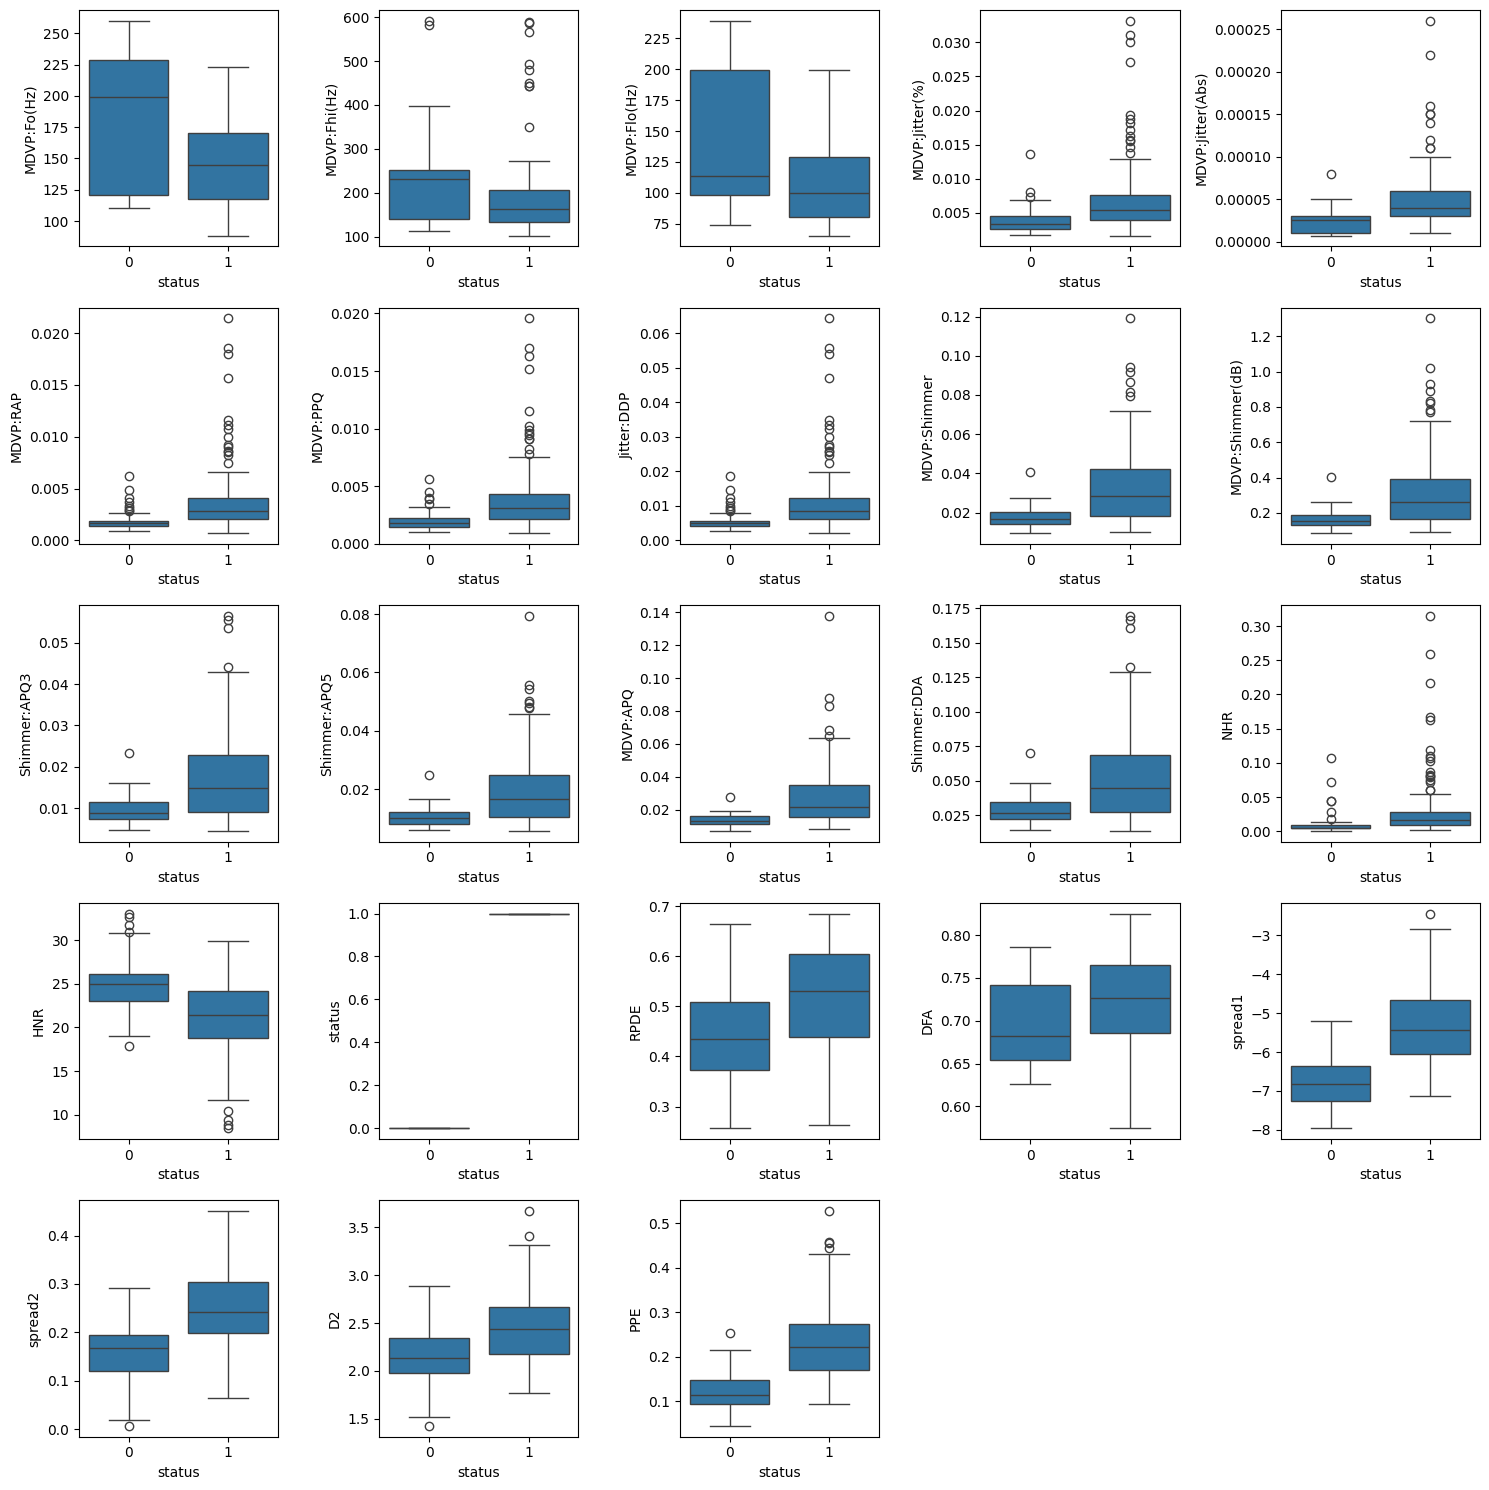

In [13]:
fig, axes = plt.subplots(5, 5, figsize=(15, 15))
axes = axes.flatten()

num_plots = min(len(parkinsons_data.columns) - 1, len(axes))

for i, column_name in enumerate(list(parkinsons_data.columns)[1:num_plots + 1], 1):
    sns.boxplot(x='status', y=parkinsons_data[column_name], data=parkinsons_data, orient='v', ax=axes[i - 1])
for ax in axes[len(parkinsons_data.columns)-1:]:
    ax.remove()
plt.tight_layout()
plt.show()

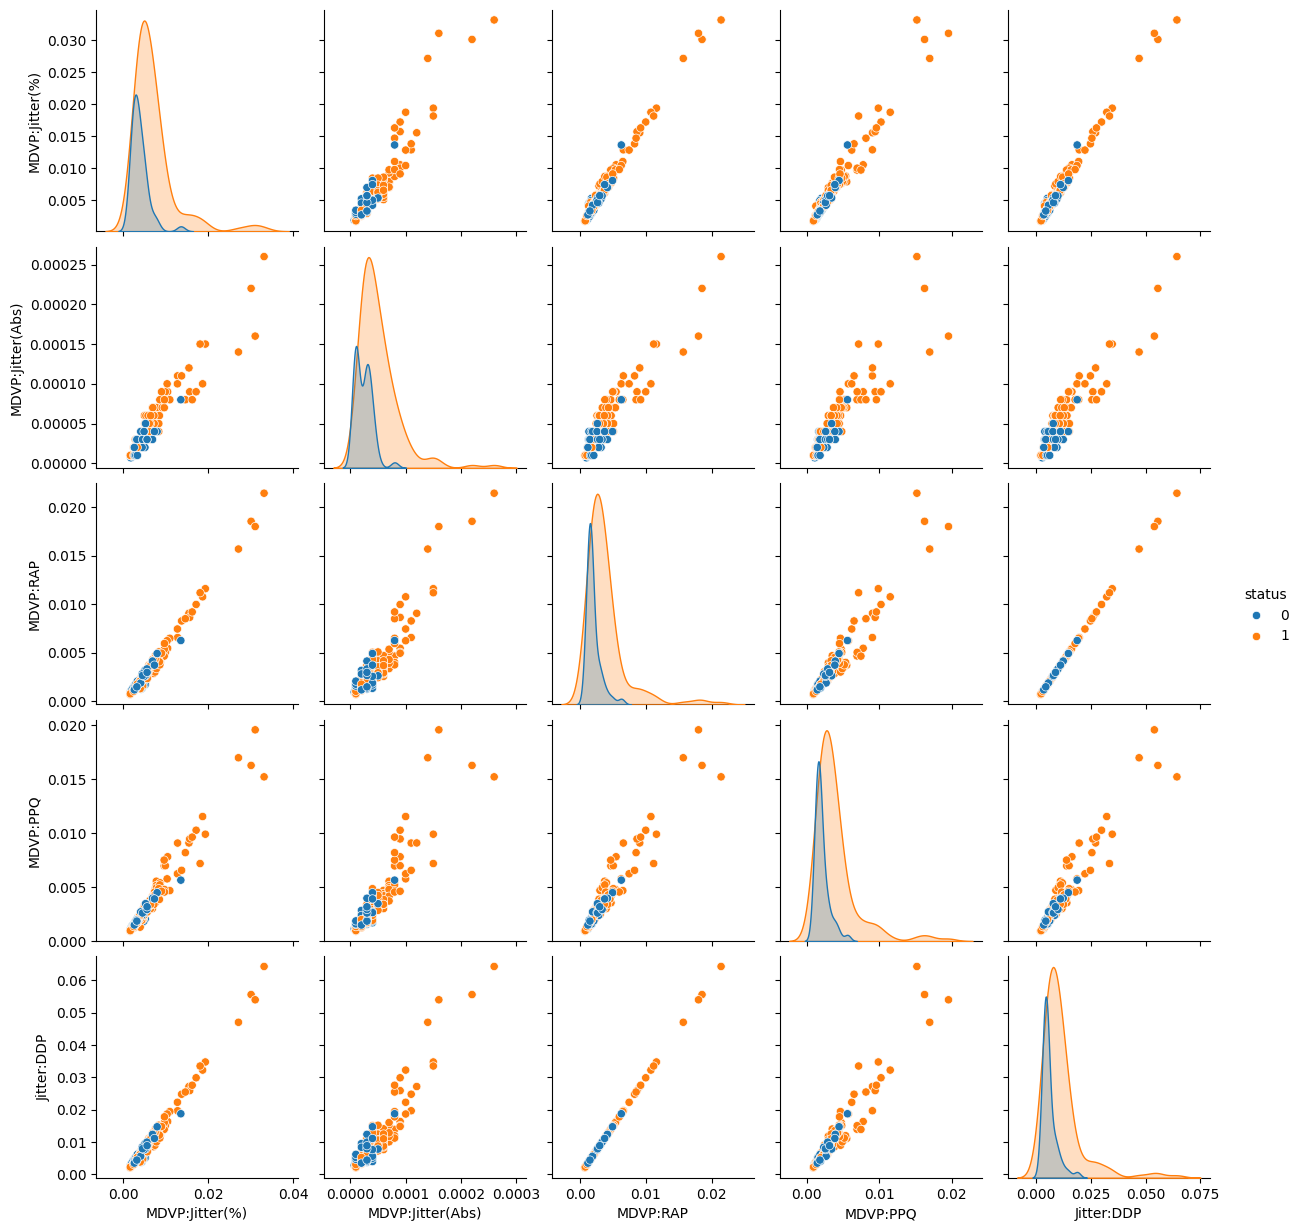

In [14]:
sns.pairplot(parkinsons_data, hue = 'status', vars = ['MDVP:Jitter(%)','MDVP:Jitter(Abs)','MDVP:RAP','MDVP:PPQ', 'Jitter:DDP'] )
plt.show()

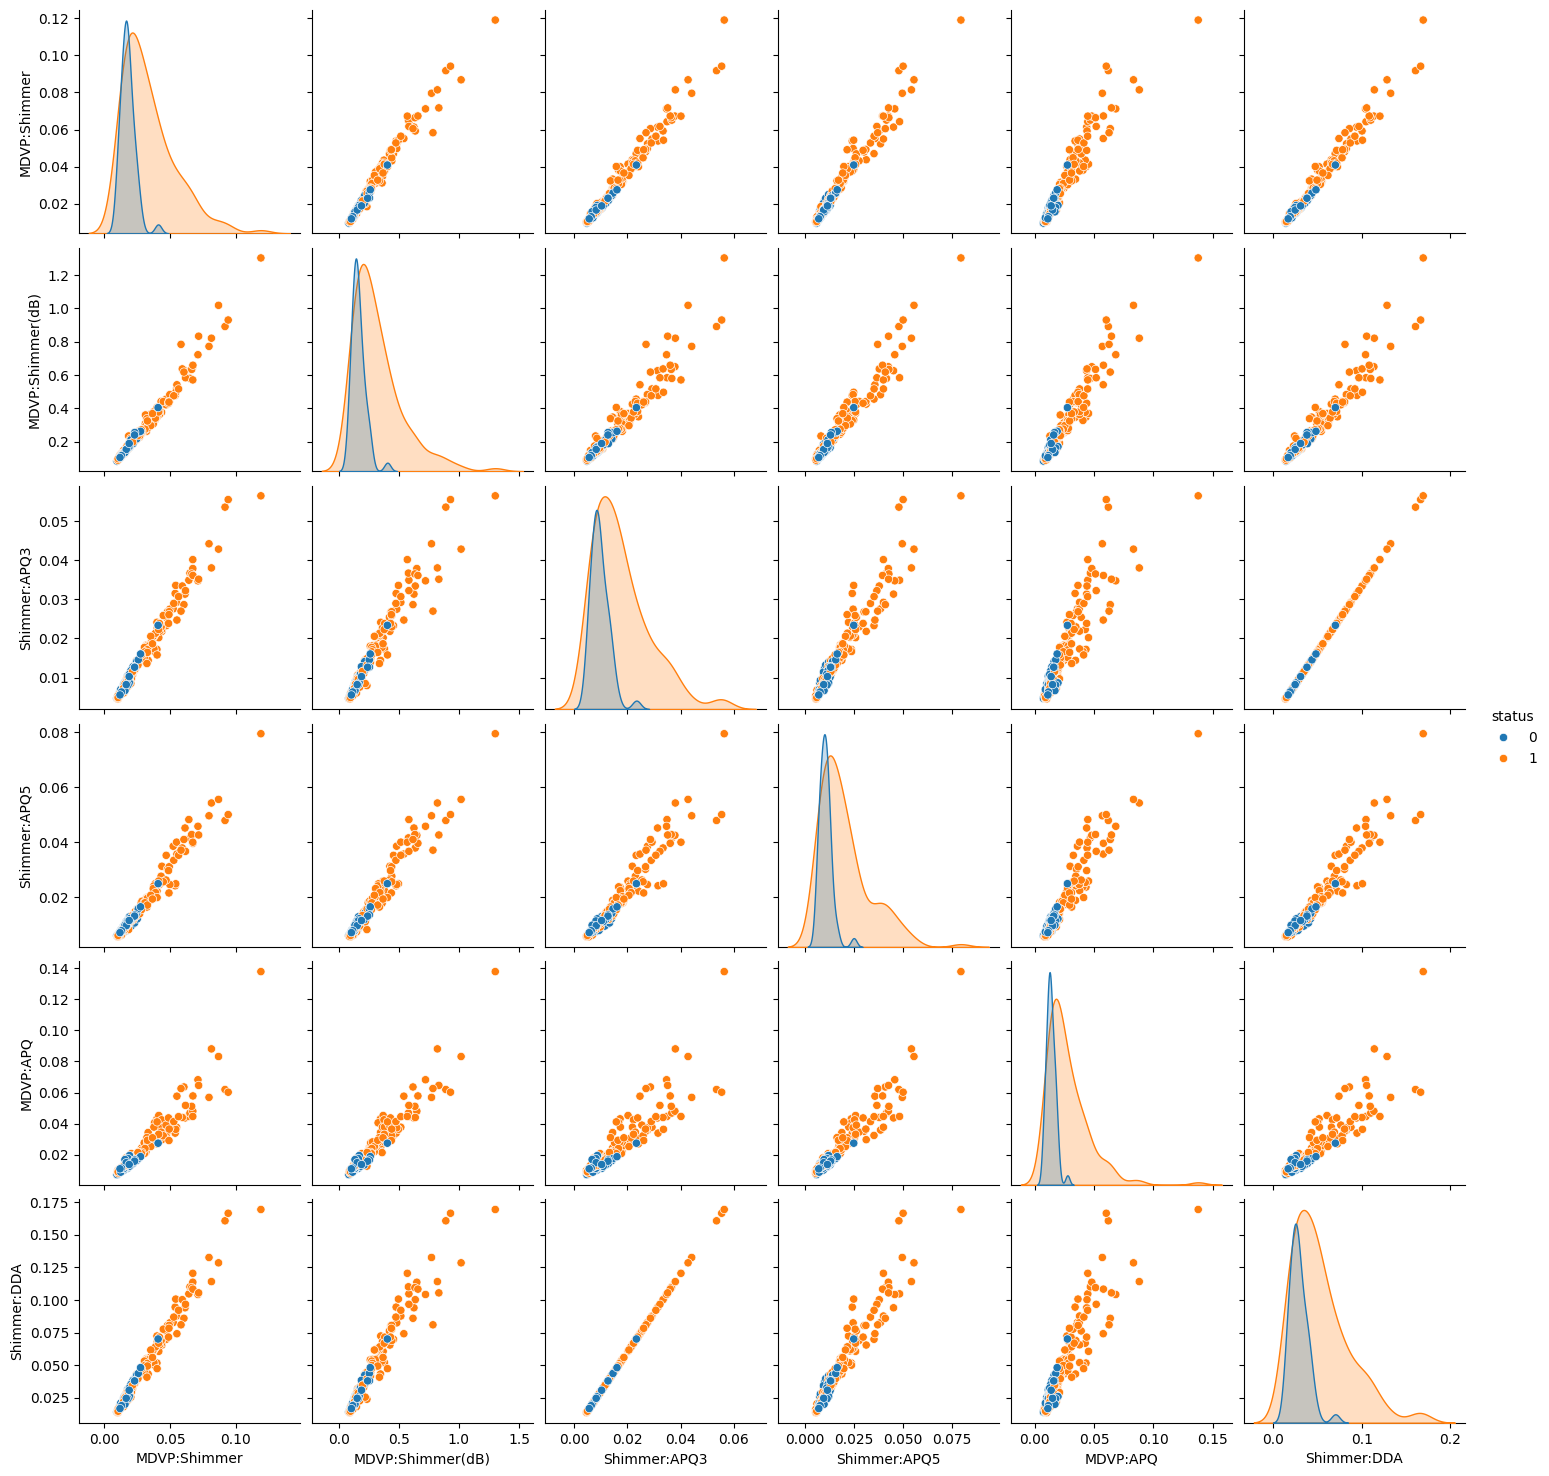

In [15]:
sns.pairplot(parkinsons_data, hue = 'status', vars = ['MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA'] )
plt.show()

In [16]:
numeric_data = parkinsons_data.select_dtypes(include=[np.number])  
corr = numeric_data.corr()     #Calculate correlation matrix
corr

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


<Axes: >

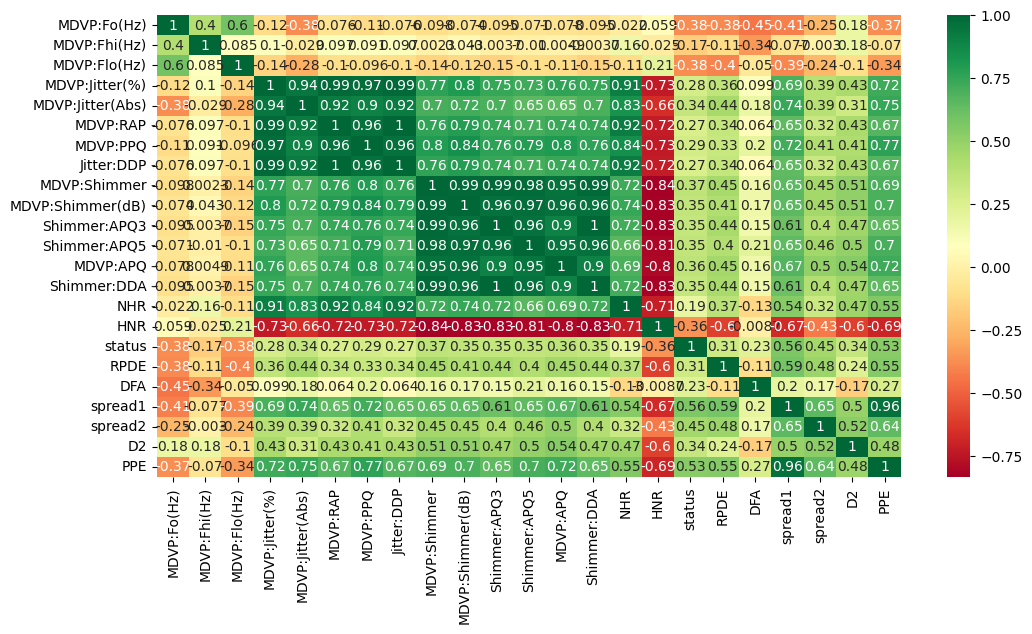

In [17]:
#Heatmap displays correlation coefficients, with stronger correlations represented by more intense colors
sns.heatmap(numeric_data.corr(),annot=True,cmap='RdYlGn')

<Axes: >

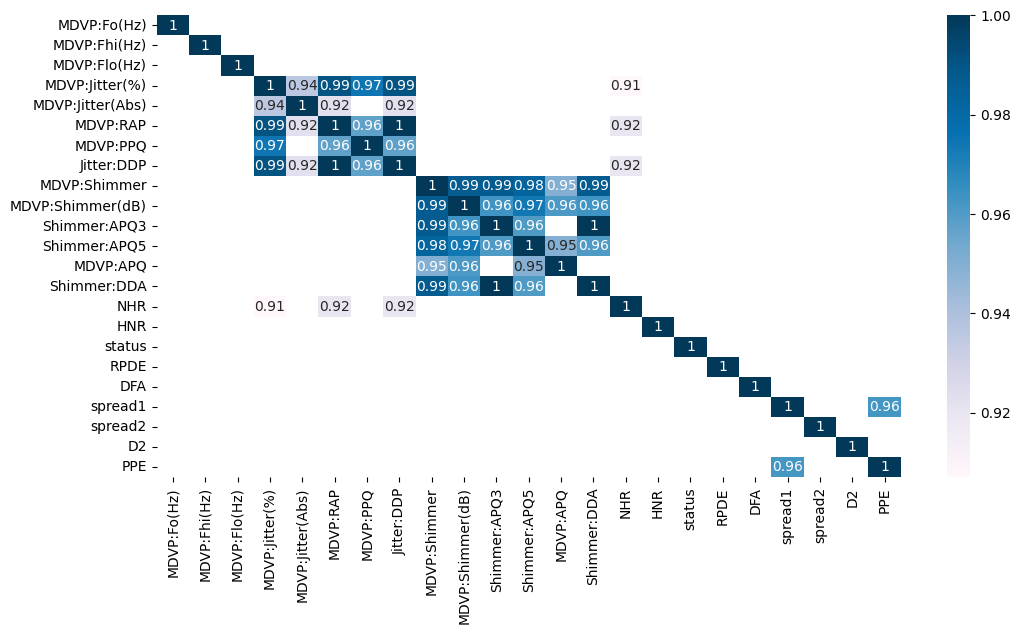

In [18]:
sns.heatmap(corr[(corr>0.9)],annot=True,cmap='PuBu')

<Axes: xlabel='spread1', ylabel='PPE'>

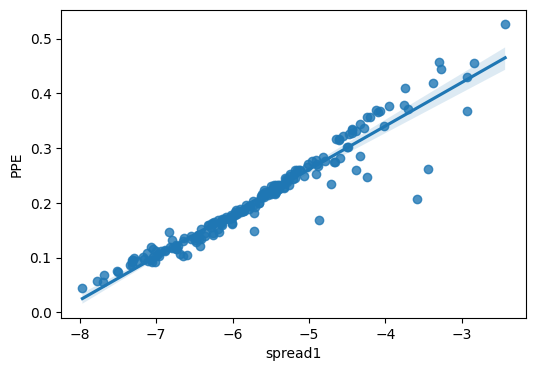

In [19]:
plt.figure(figsize=(6, 4))
sns.regplot(x='spread1', y='PPE', data=parkinsons_data)

In [20]:
from scipy import stats

In [21]:
pearson_coef, p_value = stats.pearsonr(parkinsons_data['spread1'], parkinsons_data['PPE'])
print ("The Pearson Correlation coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation coefficient is 0.9624352932572812  with a P-value of P = 3.1338007401479317e-111


In [22]:
#Separate independent and dependent variable
X = parkinsons_data.drop(['status', 'name'], axis = 1)
y = parkinsons_data.status

In [23]:
#Detect Label Imbalance
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter 
print(Counter(y))

Counter({1: 147, 0: 48})


In [24]:
#Balance the labels
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X,y)
print(Counter(y_ros))

Counter({1: 147, 0: 147})


In [25]:
#Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((-1,1))
X = scaler.fit_transform(X_ros)
y = y_ros

In [26]:
#Applying Feature Engineering
#Applying Principal Component Analysis (PCA)
#Choose the minimum number of principal components such that 95% of the variance is retained
from sklearn.decomposition import PCA
pca = PCA(.95)
X_PCA = pca.fit_transform(X)

print(X.shape)
print(X_PCA.shape)

(294, 22)
(294, 8)


In [27]:
#Splitting the dataset into Training and Testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_PCA, y, test_size=0.2, random_state=7)

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score,  r2_score, roc_curve, auc, classification_report
from sklearn.model_selection import GridSearchCV

In [29]:
#Logisitic Regression
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(C= 0.01, penalty= 'l2', solver= 'newton-cg')
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
print("Logistic Regression (log_reg) Accuracy:", log_reg_accuracy)

Logistic Regression (log_reg) Accuracy: 0.8305084745762712


In [30]:
log_reg_params = dict(solver = ['newton-cg', 'lbfgs', 'liblinear'],
 penalty = ['l2'],
 C = [100, 10, 1.0, 0.1, 0.01])

In [31]:
#Hyperparameter Tuning and Cross Validation of Logistic Regression
log_reg = GridSearchCV(LogisticRegression(),param_grid = log_reg_params,cv = 5,scoring 
= 'accuracy',n_jobs = -1)
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
print("Tunned Logistic Regression (log_reg) Accuracy:", log_reg_accuracy)
log_reg_best = log_reg.best_estimator_
print("Best Parameters:", log_reg.best_params_)

Tunned Logistic Regression (log_reg) Accuracy: 0.847457627118644
Best Parameters: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


In [32]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(random_state=0)
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)
dtree_accuracy = accuracy_score(y_test, dtree_pred)
print("Desicion Tree (dtree) Accuracy:", dtree_accuracy)

Desicion Tree (dtree) Accuracy: 0.864406779661017


In [33]:
#Hyperparameter Tuning and Cross Validation of Decision Tree
dtree_params=dict(max_depth = range(2,10,1),
 min_samples_split = range(2,10,1),
 min_samples_leaf = [0.01, 0.05, 0.1]
 )
dtree= GridSearchCV(DecisionTreeClassifier(),param_grid = dtree_params,cv = 5,scoring = 
'accuracy',n_jobs = -1)
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)
dtree_accuracy = accuracy_score(y_test, dtree_pred)
print("Tunned Desicion Tree (dtree) Accuracy:", dtree_accuracy)
dtree_best = dtree.best_estimator_
print("Best Parameters:", dtree.best_params_)

Tunned Desicion Tree (dtree) Accuracy: 0.8813559322033898
Best Parameters: {'max_depth': 8, 'min_samples_leaf': 0.01, 'min_samples_split': 4}


In [34]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rforest=RandomForestClassifier(n_estimators=50, random_state=0)
rforest.fit(X_train, y_train)
rforest_pred = rforest.predict(X_test)
rforest_accuracy = accuracy_score(y_test, rforest_pred)
print("Random Forest (rforest) Accuracy:", rforest_accuracy)

Random Forest (rforest) Accuracy: 0.9491525423728814


In [35]:
#Hyperparameter Tuning and Cross Validation of Random Forest
rforest_params = {
    'max_depth': range(2, 7),
    'min_samples_split': range(2, 7),
    'min_samples_leaf': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 150]
}
rforest_grid_search = GridSearchCV(
    RandomForestClassifier(random_state=0),
    param_grid=rforest_params,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
rforest_grid_search.fit(X_train, y_train)
best_rforest = rforest_grid_search.best_estimator_
best_params = rforest_grid_search.best_params_
rforest_pred = best_rforest.predict(X_test)
rforest_accuracy = accuracy_score(y_test, rforest_pred)
print("Tuned Random Forest (best_rforest) Accuracy:", rforest_accuracy)
print("Best Parameters:", best_params)

Tuned Random Forest (best_rforest) Accuracy: 0.9322033898305084
Best Parameters: {'max_depth': 6, 'min_samples_leaf': 0.01, 'min_samples_split': 2, 'n_estimators': 150}


In [36]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
nb_pred = nb_classifier.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_pred)
print("Naive Bayes (Gaussian) Accuracy:", nb_accuracy)

Naive Bayes (Gaussian) Accuracy: 0.847457627118644


In [37]:
#Hyperparameter Tuning and Cross Validation of Naive Bayes
nb_params= {'var_smoothing': [1e-10, 1e-9, 1e-8, 1e-7]}
nb_classifier = GridSearchCV(GaussianNB(), nb_params, cv=5,scoring="accuracy",n_jobs=-
1)
nb_classifier.fit(X_train, y_train)
nb_classifier_best = nb_classifier.best_estimator_
nb_classifier_pred_tunned = nb_classifier_best.predict(X_test)
nb_classifier_accuracy_tunned = accuracy_score(y_test, nb_classifier_pred_tunned)
print("Tunned Naive Bayes (nb_classifier) Accuracy:", nb_classifier_accuracy_tunned)
print("Best Parameters:", nb_classifier.best_params_)

Tunned Naive Bayes (nb_classifier) Accuracy: 0.847457627118644
Best Parameters: {'var_smoothing': 1e-10}


In [38]:
#K-Nearest Neighbor (KNN)
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors = 2, weights ='distance')
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print("K nearest Neighbour (knn) Accuracy:", knn_accuracy)

K nearest Neighbour (knn) Accuracy: 0.9491525423728814


In [39]:
#Hyperparameter Tuning and Cross Validation of KNN
knn_params = {
    'n_neighbors': range(2, 20, 2),  
    'weights': ['uniform', 'distance'],
    'p': [1, 2],  
    'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto']  
}
knn = GridSearchCV(KNeighborsClassifier(),param_grid = knn_params,cv = 5,scoring = 'accuracy',n_jobs = -1)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print("Tunned K nearest Neighbour (knn) Accuracy:", knn_accuracy)
knn_best = knn.best_estimator_
print("Best Parameters:", knn.best_params_)

Tunned K nearest Neighbour (knn) Accuracy: 0.9661016949152542
Best Parameters: {'algorithm': 'ball_tree', 'n_neighbors': 2, 'p': 1, 'weights': 'distance'}


In [40]:
#Support Vector Machine (SVM)
from sklearn.svm import SVC
svm= SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("Support Vector Machine (SVM) Accuracy:", svm_accuracy)

Support Vector Machine (SVM) Accuracy: 0.8983050847457628


In [41]:
#Hyperparameter Tuning and Cross Validation of SVM
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm_grid = GridSearchCV(SVC(), param_grid=svm_params, cv=5, scoring='accuracy', 
n_jobs=-1)
svm_grid.fit(X_train, y_train)
svm_best = svm_grid.best_estimator_
svm_pred_tunned = svm_best.predict(X_test)
svm_accuracy_tunned = accuracy_score(y_test, svm_pred_tunned)
print("Tunned Support Vector Machine (SVM) Accuracy:", svm_accuracy_tunned)
print("Best Parameters:", svm_grid.best_params_)

Tunned Support Vector Machine (SVM) Accuracy: 0.9491525423728814
Best Parameters: {'C': 10, 'kernel': 'rbf'}


In [42]:
#Voting Classifier
from sklearn.ensemble import VotingClassifier
#Define the base classifiers
base_classifiers = [
    ('log_reg', LogisticRegression(C=0.01, penalty='l2', solver='newton-cg')),
    ('dtree', DecisionTreeClassifier(random_state=0)),
    ('rforest', RandomForestClassifier(n_estimators=60, random_state=0)),
    ('nb_classifier', GaussianNB()),
    ('knn', KNeighborsClassifier(n_neighbors=2, weights='uniform')),
    ('svm', SVC())
]
voting_classifier = VotingClassifier(estimators=base_classifiers, voting='hard')
voting_classifier.fit(X_train, y_train)
voting_pred = voting_classifier.predict(X_test)
voting_accuracy = accuracy_score(y_test, voting_pred)
print("Voting Classifier Accuracy:", voting_accuracy)

Voting Classifier Accuracy: 0.8983050847457628


In [43]:
base_classifiers = [
    ('log_reg', LogisticRegression()),
    ('dtree', DecisionTreeClassifier()),
    ('rforest', RandomForestClassifier()),
    ('nb_classifier', GaussianNB()),
    ('knn', KNeighborsClassifier()),
    ('svm', SVC())
]
voting_params = {
    'log_reg__C': [0.01, 0.1],
    'dtree__max_depth': [3, 4],
    'rforest__n_estimators': [50, 100],
    'nb_classifier__var_smoothing': [1e-10, 1e-9],
    'knn__n_neighbors': [3, 5],
    'svm__C': [0.1, 1]
}
voting_classifier = VotingClassifier(estimators=base_classifiers, voting='hard')
voting_grid_search = GridSearchCV(voting_classifier, param_grid=voting_params, cv=5, scoring='accuracy', n_jobs=-1)
voting_grid_search.fit(X_train, y_train)
best_voting_classifier = voting_grid_search.best_estimator_
best_voting_pred = best_voting_classifier.predict(X_test)
best_voting_accuracy = accuracy_score(y_test, best_voting_pred)
print("Tuned Voting Classifier Accuracy:", best_voting_accuracy)
print("Best Parameters for Voting Classifier:", voting_grid_search.best_params_)

Tuned Voting Classifier Accuracy: 0.8813559322033898
Best Parameters for Voting Classifier: {'dtree__max_depth': 4, 'knn__n_neighbors': 3, 'log_reg__C': 0.01, 'nb_classifier__var_smoothing': 1e-10, 'rforest__n_estimators': 50, 'svm__C': 1}


In [44]:
#XGBoost (Extreme Gradient Boosting)
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier(
    max_depth=4,
    learning_rate=0.1,
    n_estimators=100
)
xgb_classifier.fit(X_train, y_train)
xgb_pred = xgb_classifier.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
print("XGBoost Accuracy:", xgb_accuracy)

XGBoost Accuracy: 0.9152542372881356


In [45]:
#Hyperparameter Tuning and Cross Validation of Xgboost
xgb_params = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300]
}
xgb_grid_search = GridSearchCV(xgb_classifier, param_grid=xgb_params, cv=5, scoring='accuracy', n_jobs=-1)
xgb_grid_search.fit(X_train, y_train)
best_xgb_classifier = xgb_grid_search.best_estimator_
xgb_pred = best_xgb_classifier.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
print("Tuned XGBoost Accuracy:", xgb_accuracy)
print("Best Parameters for XGBoost:", xgb_grid_search.best_params_)

Tuned XGBoost Accuracy: 0.8983050847457628
Best Parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300}


In [46]:
#Stacking Classifier
from sklearn.ensemble import StackingClassifier
base_classifiers = [
    ('dtree', DecisionTreeClassifier()),
    ('svm', SVC())
]
#Initialize the meta-classifier
meta_classifier = LogisticRegression()
#Initialize the stacking classifier
stacking_classifier = StackingClassifier(estimators=base_classifiers, final_estimator=meta_classifier)
stacking_classifier.fit(X_train, y_train)
stacking_pred = stacking_classifier.predict(X_test)
stacking_accuracy = accuracy_score(y_test, stacking_pred)
print("Stacking Classifier Accuracy:", stacking_accuracy)

Stacking Classifier Accuracy: 0.9491525423728814


In [47]:
#Hyperparameter Tuning and Cross Validation of Stacking Classifier
base_classifiers = [
    ('dtree', DecisionTreeClassifier()),
    ('svm', SVC())
]
base_params = {
    'dtree__max_depth': [3, 4, 5],
    'svm__C': [0.1, 1, 10]
}
meta_classifier = LogisticRegression()
stacking_classifier = StackingClassifier(estimators=base_classifiers, final_estimator=meta_classifier)
stacking_grid_search = GridSearchCV(stacking_classifier, param_grid=base_params, cv=5, scoring='accuracy', n_jobs=-1)
stacking_grid_search.fit(X_train, y_train)
best_stacking_classifier = stacking_grid_search.best_estimator_
best_stacking_pred = best_stacking_classifier.predict(X_test)
best_stacking_accuracy = accuracy_score(y_test, best_stacking_pred)
print("Tuned Stacking Classifier Accuracy:", best_stacking_accuracy)
print("Best Parameters for Stacking Classifier:", stacking_grid_search.best_params_)

Tuned Stacking Classifier Accuracy: 0.9661016949152542
Best Parameters for Stacking Classifier: {'dtree__max_depth': 4, 'svm__C': 10}


In [48]:
#Classification Report
from tabulate import tabulate
#Calculate additional metrics
classifiers = [log_reg, dtree, rforest, nb_classifier, knn, svm_grid, voting_grid_search, xgb_grid_search, stacking_grid_search]
accuracy = []
f1_score = []
recall = []
precision = []
r2_score_list = []
for classifier in classifiers:
    pred = classifier.predict(X_test)
    accuracy.append(accuracy_score(y_test, pred))
    report = classification_report(y_test, pred, output_dict=True)
    f1_score.append(report['weighted avg']['f1-score'])
    recall.append(report['weighted avg']['recall'])
    precision.append(report['weighted avg']['precision'])
#Calculate R2-score for each classifier
y_pred_list = [log_reg_pred, dtree_pred, rforest_pred, nb_classifier_pred_tunned, knn_pred, svm_pred_tunned, best_voting_pred, xgb_pred, best_stacking_pred]
y_true = y_test
for y_pred in y_pred_list:
    r2_score_list.append(r2_score(y_true, y_pred))
#Gather results
results = {
    "Classifier": ["Logistic Regression", "Decision Tree", "Random Forest", "Naive Bayes", "KNN", "SVM", "Voting Classifier", "XGBoost", "Stacking Classifier"],
    "Accuracy": accuracy,
    "F1-Score": f1_score,
    "Recall": recall,
    "Precision": precision,
    "R2-Score": r2_score_list
}
results_df = pd.DataFrame(results)
table_str = tabulate(results_df, headers='keys', tablefmt='pretty')
print(table_str)

+---+---------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|   |     Classifier      |      Accuracy      |      F1-Score      |       Recall       |     Precision      |      R2-Score      |
+---+---------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
| 0 | Logistic Regression | 0.847457627118644  | 0.8485290397464323 | 0.847457627118644  | 0.8539901129943503 | 0.3678571428571429 |
| 1 |    Decision Tree    | 0.8813559322033898 | 0.8817068463347019 | 0.8813559322033898 | 0.8825722831505484 | 0.5083333333333333 |
| 2 |    Random Forest    | 0.9491525423728814 | 0.9489696926601078 | 0.9491525423728814 | 0.9493572422828135 | 0.719047619047619  |
| 3 |     Naive Bayes     | 0.847457627118644  | 0.8469090779803233 | 0.847457627118644  | 0.8468639973798412 | 0.3678571428571429 |
| 4 |         KNN         | 0.9661016949152542 | 0.9658355850323427 |

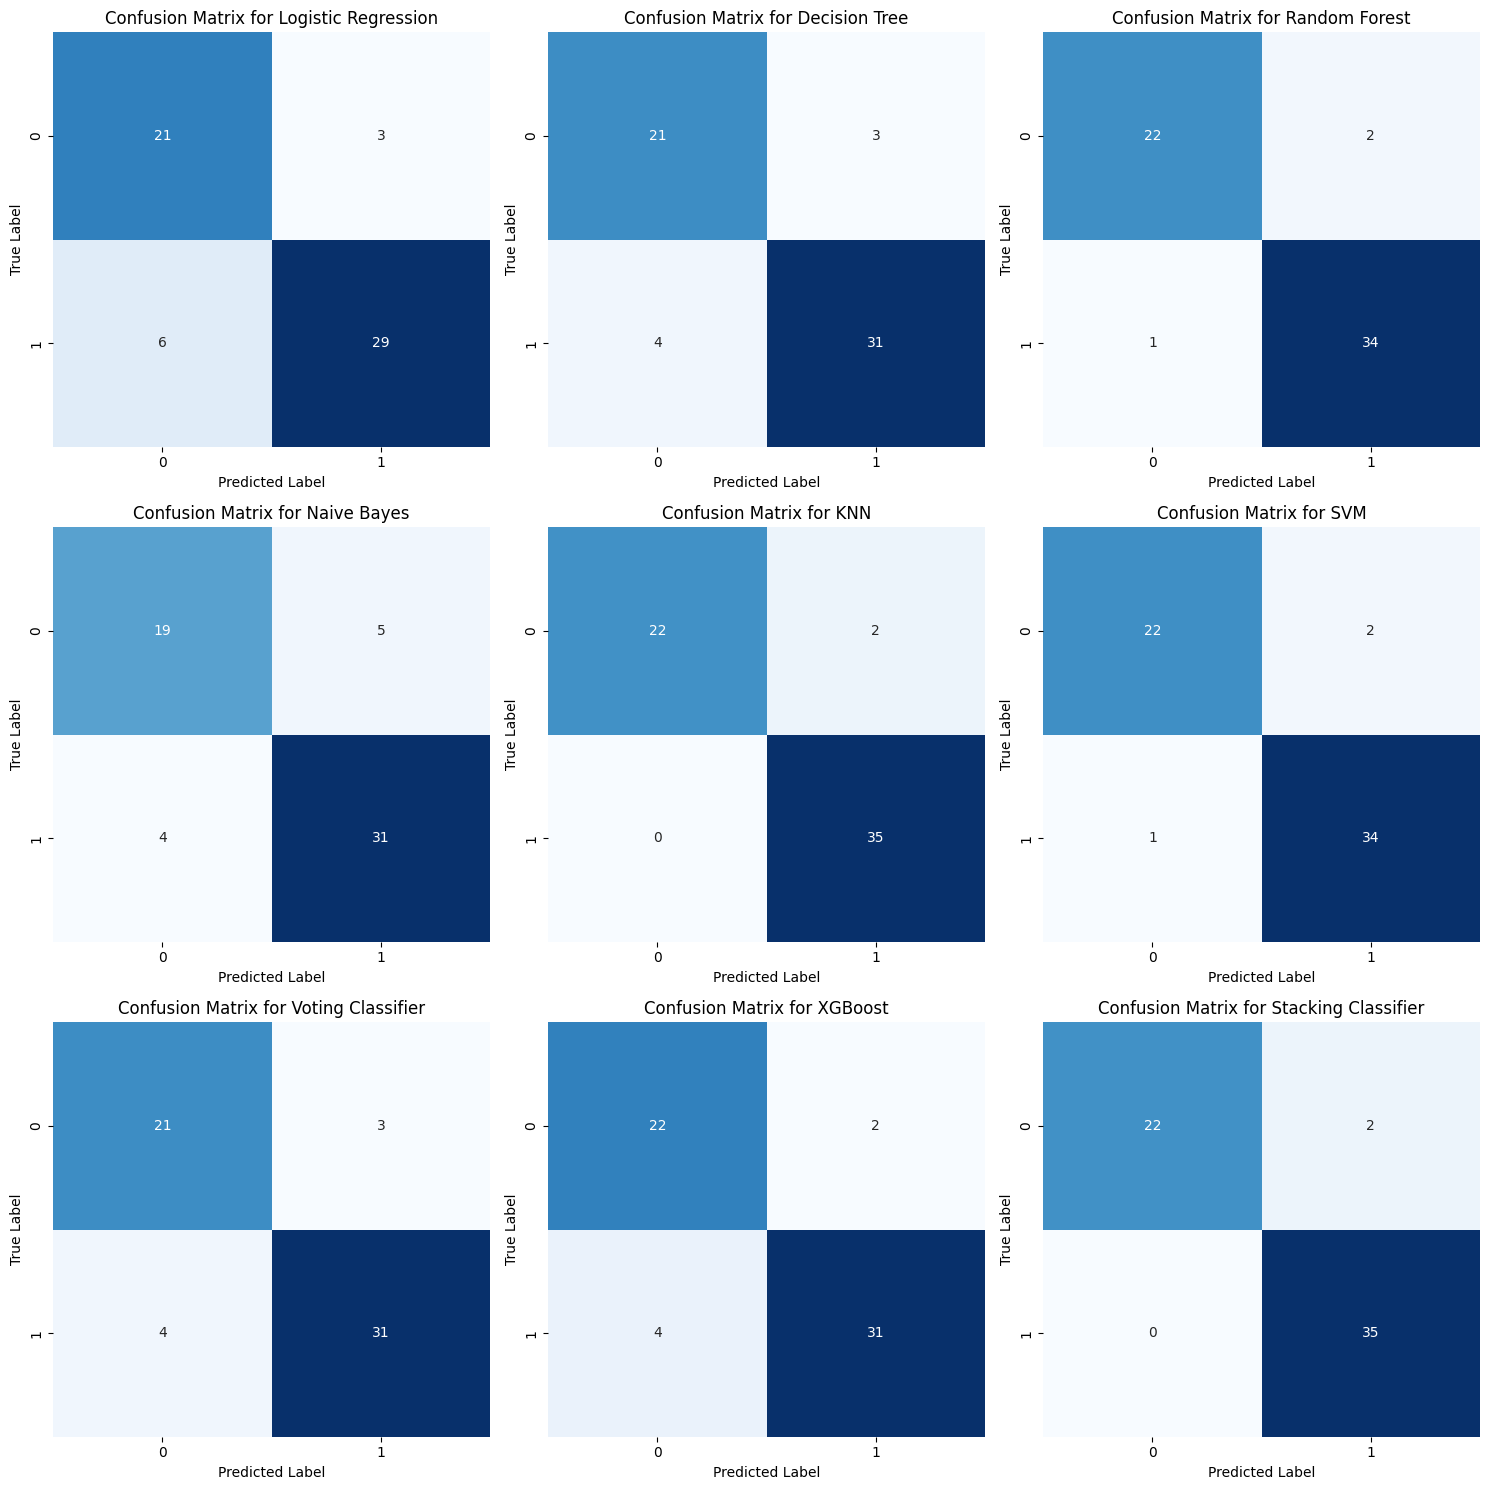

In [49]:
#Calculate confusion matrices for each classifier
conf_matrices = []
for classifier in classifiers:
    pred = classifier.predict(X_test)
    conf_matrices.append(confusion_matrix(y_test, pred))
num_classifiers = len(classifiers)
num_rows = (num_classifiers + 2) // 3  #Calculate number of rows
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))  
for i, (conf_matrix, classifier_name) in enumerate(zip(conf_matrices, results_df['Classifier'])):
    row = i // 3  
    col = i % 3
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[row, col])
    axes[row, col].set_title(f'Confusion Matrix for {classifier_name}')
    axes[row, col].set_xlabel('Predicted Label')
    axes[row, col].set_ylabel('True Label')
#Remove empty subplots
for i in range(num_classifiers, num_rows * 3):  
    row = i // 3  
    col = i % 3
    fig.delaxes(axes[row, col])
plt.tight_layout()
plt.show()